# Exercises - Machine Learning for linear regression

In this exercise, you will implement linear regression with multiple variables to predict the _prices of houses_. 
The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

1. Import the relevant Python libraries and load the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = np.loadtxt("data/linear_regression/ex1data2.txt", delimiter=",")
X = dataset[:,:2]
# note: prices are stored in a column array
y = dataset[:,2].reshape(-1,1)
print(X.shape)

(47, 2)


2. Standardize the dataset

In [3]:
# standardization of the dataset
mean_features = np.mean(X, axis=0)
std_features = np.std(X, axis=0)
mean_targets = np.mean(y, axis=0)
std_targets = np.std(y, axis=0)
print(mean_features, std_features)
X_norm = (X-mean_features)/std_features
y_norm = (y-mean_targets)/std_targets
# adding column of ones
X_norm = np.hstack((np.ones((X_norm.shape[0],1)), X_norm))

[2000.68085106    3.17021277] [7.86202619e+02 7.52842809e-01]


3. Implement the _LinearRegression_ class (must contain the methods _fit_, _MSE_ and _predict_, as in the example). Use Gradient Descent for minimization.

In [4]:
class LinearRegression:
    def __init__(self):
        b = -1.
        a = 1.
        self.w = (b - a) * np.random.random_sample((3,1)) + a

    def fit(self, X, y, learning_rate, epochs):
        self.error = []

        N = X.shape[0]
        
        for i in range(epochs):
            dMSEdw = (2/N)*X.T @ (X @ self.w-y)
            self.w -= learning_rate*dMSEdw
            training_prediction = self.predict(X)
            error = self.MSE(training_prediction, y)
            self.error.append(error)
    
    def MSE(self, prediction, y):
        return np.linalg.norm(prediction - y)**2/prediction.shape[0]

    def predict(self, X):
        return X @ self.w

4. Solve the Linear Regression problem using Gradient Descent minimization and plot the MSE vs epoch number.

In [5]:
lr = LinearRegression()
lr.fit(X_norm, y_norm, 0.1, 100)

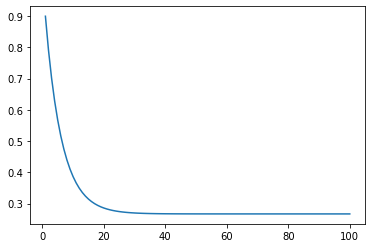

In [6]:
# learning curve
plt.plot(np.arange(1,len(lr.error)+1,1),lr.error)
plt.show()

5. Solve again the problem without standardization and plot again the MSE vs epoch number. Compare the value of the learning rate with that used in the case with standardization

6. Evaluate the MSE on the dataset

In [7]:
# training set error
train_pred = lr.predict(X_norm)
lr.MSE(train_pred, y_norm)

0.26705498946466394

7. Use the fitted model to predict the price of a 1650 ft^2 house with 3 bedrooms.

In [8]:
x = [[1650.,3.]]
x_norm = (x-mean_features)/std_features
x_norm = np.hstack((np.ones((x_norm.shape[0],1)), x_norm))
p = lr.predict(x_norm)
(p*std_targets + mean_targets).item()

293083.9750097479

8. Find the optimal weights of the model by solving the Normal Equation and compare them with those found using Gradient Descent.

In [9]:
lr.w

array([[-8.00252636e-12],
       [ 8.84673712e-01],
       [-5.30865440e-02]])

In [10]:
np.linalg.inv(X_norm.T @ X_norm) @ X_norm.T @ y_norm

array([[-4.85722573e-17],
       [ 8.84765988e-01],
       [-5.31788197e-02]])

9. (scikit-learn) Use the [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor) class of scikit-learn to train a linear regression model on the house prices dataset. Normalize the dataset using a [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) pipeline. Compare the prediction for a 1650 ft^2 / 3 bedroom house with that obtained above.

In [11]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X, y.ravel())

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [12]:
reg.predict([[1650.,3]]).item()

293165.63229600224

10. Compute the coefficient of determination ($R^2$) from the definition for the model fit at point 4. and compare it with the one of the scikit-learn model.

In [13]:
reg.score(X, y)

0.7329237090642963

In [14]:
error = train_pred - y_norm

In [15]:
std_error = np.std(error)
Rsq = 1 - std_error**2/np.std(y_norm)**2
print(Rsq)

0.7329450105353361
